# ABE 516 Project Data Exploration and Modeling

## Import libraries

In [1]:
#imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import numpy as np
import datetime as dt


# allow plots to appear directly in the notebook
%matplotlib inline

## Read in data

In [67]:
summary_df = pd.read_csv("SB Performance Summary_IA.csv")
summary_df

,Study,State,County,Site,Year,Annual Precip_mm/y,days with tile flow,total tile flow_mm/y,tile flow diverted_mm/y,Drainage Area_ha,...,Nitrate yield from field_kg N/ha,Nitrate Load diverted_kg N,Nitrate yield diverted_kg N/ha,Nitrate load removed_kg N,Nitrate yield removed_kg N/ha,Buffer Removal Percentage,EOF Removal Percentage,Flow Diversion Percentage,NO3-N removal rate_g/m/d,Notes
0,Jaynes and Isenhart 2018,IA,Hamilton,BC-1,2011,815.0,143,198.00,111.00,10.1,...,21.80,123.0,12.2,123.0,12.20,1.000,0.559,0.560,2.568,NaN
1,Jaynes and Isenhart 2018,IA,Hamilton,BC-1,2012,637.0,108,140.00,70.00,10.1,...,19.80,92.0,9.1,84.0,8.30,0.913,0.420,0.500,2.322,NaN
2,Jaynes and Isenhart 2018,IA,Hamilton,BC-1,2013,695.0,129,429.00,135.00,10.1,...,50.90,181.0,17.9,179.0,17.70,0.989,0.348,0.320,4.142,NaN
3,Jaynes and Isenhart 2018,IA,Hamilton,BC-1,2014,1027.0,153,406.00,157.00,5.9,...,54.20,111.0,18.8,111.0,18.80,1.000,0.347,0.390,2.166,NaN
4,Jaynes and Isenhart 2018,IA,Hamilton,BC-1,2015,1133.0,212,468.00,223.00,5.9,...,39.50,85.0,14.4,80.0,13.60,0.941,0.343,0.480,1.126,NaN
5,Jaynes and Isenhart 2018,IA,Hamilton,BC-1,2016,955.0,161,204.00,99.00,5.9,...,18.80,55.0,9.3,53.0,9.00,0.964,0.477,0.480,0.983,NaN
6,Jaynes and Isenhart 2018,IA,Hamilton,BC-1,2017,899.0,97,187.00,66.00,5.9,...,25.60,51.0,8.6,47.0,8.00,0.922,0.311,0.350,1.446,NaN
7,Johnson et al. XXXX,IA,Hamilton,BC-1,2018,1208.4,194,367.00,195.00,5.9,...,37.12,117.0,19.8,108.0,18.31,0.923,0.493,0.531,1.662,NaN
8,Johnson et al. XXXX,IA,Hamilton,BC-1,2019,1007.1,240,215.00,63.00,5.9,...,44.07,78.3,13.3,75.3,12.76,0.962,0.290,0.293,0.937,NaN
9,Johnson et al. XXXX,IA,Hamilton,BC-1,2020,788.6,138,140.00,41.00,5.9,...,16.02,26.5,4.5,26.2,4.44,0.989,0.277,0.293,0.567,NaN


In [68]:
total_site_years = summary_df.shape[0]
print(total_site_years)

35


**Add additional column for the product of distribution pipe length and drainage area**

This was found to be the strongest predictor of load removed in a prior study.

In [69]:
summary_df["pipe_length_times_DA"] = summary_df["Distribution pipe length_m"] * summary_df["Drainage Area_ha"]
summary_df

,Study,State,County,Site,Year,Annual Precip_mm/y,days with tile flow,total tile flow_mm/y,tile flow diverted_mm/y,Drainage Area_ha,...,Nitrate Load diverted_kg N,Nitrate yield diverted_kg N/ha,Nitrate load removed_kg N,Nitrate yield removed_kg N/ha,Buffer Removal Percentage,EOF Removal Percentage,Flow Diversion Percentage,NO3-N removal rate_g/m/d,Notes,pipe_length_times_DA
0,Jaynes and Isenhart 2018,IA,Hamilton,BC-1,2011,815.0,143,198.00,111.00,10.1,...,123.0,12.2,123.0,12.20,1.000,0.559,0.560,2.568,NaN,3383.5
1,Jaynes and Isenhart 2018,IA,Hamilton,BC-1,2012,637.0,108,140.00,70.00,10.1,...,92.0,9.1,84.0,8.30,0.913,0.420,0.500,2.322,NaN,3383.5
2,Jaynes and Isenhart 2018,IA,Hamilton,BC-1,2013,695.0,129,429.00,135.00,10.1,...,181.0,17.9,179.0,17.70,0.989,0.348,0.320,4.142,NaN,3383.5
3,Jaynes and Isenhart 2018,IA,Hamilton,BC-1,2014,1027.0,153,406.00,157.00,5.9,...,111.0,18.8,111.0,18.80,1.000,0.347,0.390,2.166,NaN,1976.5
4,Jaynes and Isenhart 2018,IA,Hamilton,BC-1,2015,1133.0,212,468.00,223.00,5.9,...,85.0,14.4,80.0,13.60,0.941,0.343,0.480,1.126,NaN,1976.5
5,Jaynes and Isenhart 2018,IA,Hamilton,BC-1,2016,955.0,161,204.00,99.00,5.9,...,55.0,9.3,53.0,9.00,0.964,0.477,0.480,0.983,NaN,1976.5
6,Jaynes and Isenhart 2018,IA,Hamilton,BC-1,2017,899.0,97,187.00,66.00,5.9,...,51.0,8.6,47.0,8.00,0.922,0.311,0.350,1.446,NaN,1976.5
7,Johnson et al. XXXX,IA,Hamilton,BC-1,2018,1208.4,194,367.00,195.00,5.9,...,117.0,19.8,108.0,18.31,0.923,0.493,0.531,1.662,NaN,1976.5
8,Johnson et al. XXXX,IA,Hamilton,BC-1,2019,1007.1,240,215.00,63.00,5.9,...,78.3,13.3,75.3,12.76,0.962,0.290,0.293,0.937,NaN,1976.5
9,Johnson et al. XXXX,IA,Hamilton,BC-1,2020,788.6,138,140.00,41.00,5.9,...,26.5,4.5,26.2,4.44,0.989,0.277,0.293,0.567,NaN,1976.5


In [72]:
summary_df = summary_df.dropna(subset = ["Nitrate load removed_kg N"])
summary_df

,Study,State,County,Site,Year,Annual Precip_mm/y,days with tile flow,total tile flow_mm/y,tile flow diverted_mm/y,Drainage Area_ha,...,Nitrate Load diverted_kg N,Nitrate yield diverted_kg N/ha,Nitrate load removed_kg N,Nitrate yield removed_kg N/ha,Buffer Removal Percentage,EOF Removal Percentage,Flow Diversion Percentage,NO3-N removal rate_g/m/d,Notes,pipe_length_times_DA
0,Jaynes and Isenhart 2018,IA,Hamilton,BC-1,2011,815.0,143,198.0,111.0,10.1,...,123.0,12.2,123.0,12.20,1.000,0.559,0.560,2.568,NaN,3383.5
1,Jaynes and Isenhart 2018,IA,Hamilton,BC-1,2012,637.0,108,140.0,70.0,10.1,...,92.0,9.1,84.0,8.30,0.913,0.420,0.500,2.322,NaN,3383.5
2,Jaynes and Isenhart 2018,IA,Hamilton,BC-1,2013,695.0,129,429.0,135.0,10.1,...,181.0,17.9,179.0,17.70,0.989,0.348,0.320,4.142,NaN,3383.5
3,Jaynes and Isenhart 2018,IA,Hamilton,BC-1,2014,1027.0,153,406.0,157.0,5.9,...,111.0,18.8,111.0,18.80,1.000,0.347,0.390,2.166,NaN,1976.5
4,Jaynes and Isenhart 2018,IA,Hamilton,BC-1,2015,1133.0,212,468.0,223.0,5.9,...,85.0,14.4,80.0,13.60,0.941,0.343,0.480,1.126,NaN,1976.5
5,Jaynes and Isenhart 2018,IA,Hamilton,BC-1,2016,955.0,161,204.0,99.0,5.9,...,55.0,9.3,53.0,9.00,0.964,0.477,0.480,0.983,NaN,1976.5
6,Jaynes and Isenhart 2018,IA,Hamilton,BC-1,2017,899.0,97,187.0,66.0,5.9,...,51.0,8.6,47.0,8.00,0.922,0.311,0.350,1.446,NaN,1976.5
7,Johnson et al. XXXX,IA,Hamilton,BC-1,2018,1208.4,194,367.0,195.0,5.9,...,117.0,19.8,108.0,18.31,0.923,0.493,0.531,1.662,NaN,1976.5
8,Johnson et al. XXXX,IA,Hamilton,BC-1,2019,1007.1,240,215.0,63.0,5.9,...,78.3,13.3,75.3,12.76,0.962,0.290,0.293,0.937,NaN,1976.5
9,Johnson et al. XXXX,IA,Hamilton,BC-1,2020,788.6,138,140.0,41.0,5.9,...,26.5,4.5,26.2,4.44,0.989,0.277,0.293,0.567,NaN,1976.5


## Inspect descriptive statistics

In [73]:
summary_df.groupby("Site").mean()

,Year,Annual Precip_mm/y,days with tile flow,total tile flow_mm/y,tile flow diverted_mm/y,Drainage Area_ha,Distribution pipe length_m,Nitrate load from field_kg N,Nitrate yield from field_kg N/ha,Nitrate Load diverted_kg N,Nitrate yield diverted_kg N/ha,Nitrate load removed_kg N,Nitrate yield removed_kg N/ha,Buffer Removal Percentage,EOF Removal Percentage,Flow Diversion Percentage,NO3-N removal rate_g/m/d,pipe_length_times_DA
Site,,,,,,,,,,,,,,,,,,
B-T,2016.5,911.000000,100.500000,50.500000,26.000000,7.100000,115.0,48.500000,6.850000,25.500000,3.550000,23.500000,3.300000,0.928500,0.511000,0.480000,2.035500,816.500000
BC-1,2016.0,897.490909,147.272727,252.954545,107.418182,7.045455,335.0,212.772727,30.078182,84.872727,11.836364,81.754545,11.389091,0.957364,0.416000,0.450455,1.706182,2360.227273
BC-2,2018.5,927.566667,270.333333,322.666667,83.800000,40.500000,168.0,1112.500000,27.461667,281.933333,6.966667,182.950000,4.518333,0.686333,0.188000,0.254333,3.832333,6804.000000
HG,2016.5,866.000000,206.000000,170.000000,38.000000,21.800000,124.0,223.500000,10.250000,56.000000,2.600000,55.000000,2.500000,0.982000,0.245500,0.230000,2.145000,2703.200000
IA-1,2017.0,1028.728571,153.857143,248.842857,227.800000,4.700000,308.0,79.928571,17.014286,71.757143,15.271429,65.842857,14.017143,0.912857,0.808714,0.888571,1.410857,1447.600000
SH,2018.5,952.883333,224.166667,545.833333,263.833333,3.500000,266.0,174.383333,49.823333,80.700000,23.050000,48.183333,13.771667,0.607167,0.354000,0.558333,0.741000,931.000000


In [74]:
summary_df.groupby("Year").mean()

,Annual Precip_mm/y,days with tile flow,total tile flow_mm/y,tile flow diverted_mm/y,Drainage Area_ha,Distribution pipe length_m,Nitrate load from field_kg N,Nitrate yield from field_kg N/ha,Nitrate Load diverted_kg N,Nitrate yield diverted_kg N/ha,Nitrate load removed_kg N,Nitrate yield removed_kg N/ha,Buffer Removal Percentage,EOF Removal Percentage,Flow Diversion Percentage,NO3-N removal rate_g/m/d,pipe_length_times_DA
Year,,,,,,,,,,,,,,,,,
2011,815.000000,143.000000,198.000000,111.000000,10.100000,335.000000,220.000000,21.800000,123.000000,12.200000,123.000000,12.200000,1.000000,0.559000,0.560000,2.568000,3383.500000
2012,637.000000,108.000000,140.000000,70.000000,10.100000,335.000000,200.000000,19.800000,92.000000,9.100000,84.000000,8.300000,0.913000,0.420000,0.500000,2.322000,3383.500000
2013,695.000000,129.000000,429.000000,135.000000,10.100000,335.000000,514.000000,50.900000,181.000000,17.900000,179.000000,17.700000,0.989000,0.348000,0.320000,4.142000,3383.500000
2014,1065.500000,117.500000,250.000000,117.500000,5.300000,321.500000,193.500000,34.250000,83.500000,15.350000,83.000000,15.250000,0.991000,0.584000,0.610000,2.172000,1712.050000
2015,1159.500000,195.500000,374.500000,240.000000,5.300000,321.500000,154.500000,27.850000,77.500000,14.650000,69.500000,13.100000,0.892000,0.559500,0.695000,1.098000,1712.050000
2016,992.500000,192.666667,231.833333,94.333333,13.916667,219.333333,379.000000,18.583333,110.333333,7.850000,52.166667,5.550000,0.747500,0.380667,0.455000,1.375833,2446.466667
2017,857.333333,164.333333,276.500000,124.166667,13.916667,219.333333,332.166667,23.550000,84.500000,9.333333,52.666667,5.583333,0.771333,0.388667,0.478333,1.732833,2446.466667
2018,1256.700000,262.750000,679.500000,347.000000,13.650000,269.250000,607.000000,62.530000,267.500000,31.150000,221.500000,24.807500,0.843500,0.502500,0.572750,3.519750,2789.775000
2019,1005.225000,269.000000,384.500000,197.975000,13.650000,269.250000,442.750000,36.565000,106.300000,14.675000,89.925000,11.787500,0.828750,0.356500,0.448250,1.403500,2789.775000


In [75]:
print(summary_df.mean())
print(summary_df.std())
print(summary_df.median())

Year                                2017.147059
Annual Precip_mm/y                   938.535294
days with tile flow                  184.617647
total tile flow_mm/y                 299.305882
tile flow diverted_mm/y              146.764706
Drainage Area_ha                      12.711765
Distribution pipe length_m           262.441176
Nitrate load from field_kg N         328.391176
Nitrate yield from field_kg N/ha      27.878529
Nitrate Load diverted_kg N           111.020588
Nitrate yield diverted_kg N/ha        12.632353
Nitrate load removed_kg N             85.411765
Nitrate yield removed_kg N/ha         10.139412
Buffer Removal Percentage              0.838324
EOF Removal Percentage                 0.441235
Flow Diversion Percentage              0.513853
NO3-N removal rate_g/m/d               1.895441
Notes                                       NaN
pipe_length_times_DA                2633.679412
dtype: float64
Year                                   2.536191
Annual Precip_mm/y       

C:\Users\gjohnson\AppData\Local\Temp\ipykernel_10696\1581719740.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(summary_df.mean())
C:\Users\gjohnson\AppData\Local\Temp\ipykernel_10696\1581719740.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(summary_df.std())
C:\Users\gjohnson\AppData\Local\Temp\ipykernel_10696\1581719740.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(summary_df.median())


## Exploration Plots: Histograms, boxplots, scatterplots

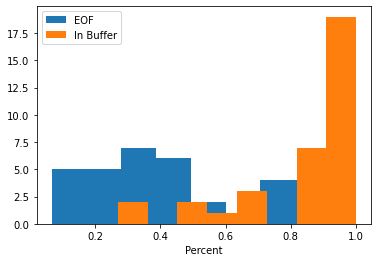

In [76]:
plt.hist(summary_df["EOF Removal Percentage"], bins = 8, label = "EOF")
plt.hist(summary_df["Buffer Removal Percentage"], bins = 8, label = "In Buffer")
plt.xlabel("Percent")
plt.legend()
plt.show()

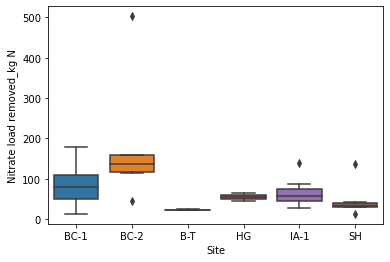

In [77]:
sns.boxplot(x = summary_df["Site"],
           y = summary_df["Nitrate load removed_kg N"])
plt.savefig("N removed boxplot.png")

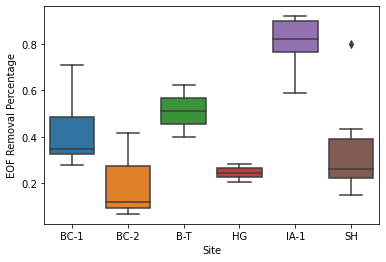

In [78]:
sns.boxplot(x = summary_df["Site"],
           y = summary_df["EOF Removal Percentage"])
plt.savefig("EOF removal boxplot.png")

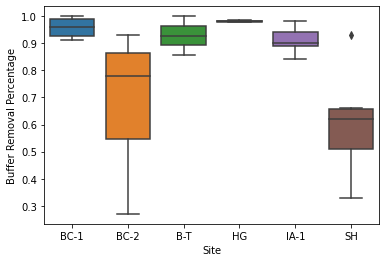

In [79]:
sns.boxplot(x = summary_df["Site"],
           y = summary_df["Buffer Removal Percentage"])
plt.savefig("buffer removal boxplot.png")

<AxesSubplot:xlabel='Site', ylabel='Flow Diversion Percentage'>

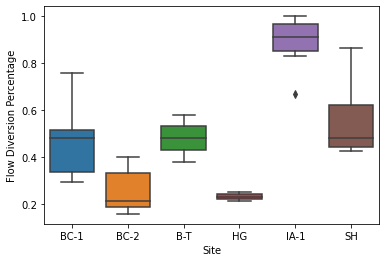

In [80]:
sns.boxplot(x = summary_df["Site"],
           y = summary_df["Flow Diversion Percentage"])

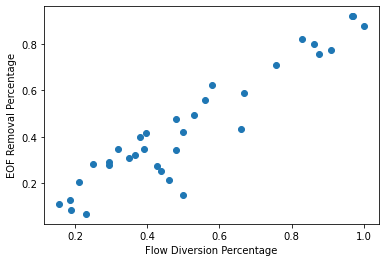

In [81]:
plt.scatter(summary_df["Flow Diversion Percentage"], summary_df["EOF Removal Percentage"])
plt.ylabel("EOF Removal Percentage")
plt.xlabel("Flow Diversion Percentage")
plt.savefig("EOF vs flow percent.png")

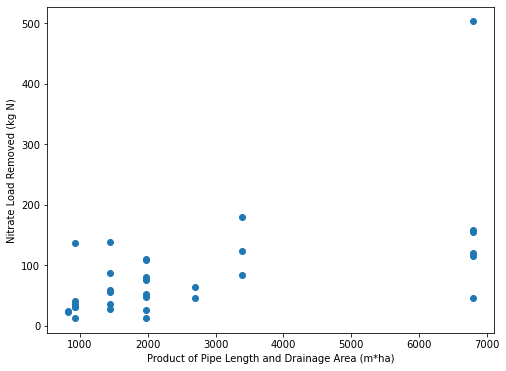

In [82]:
plt.figure(figsize = (8,6))
plt.scatter(summary_df["pipe_length_times_DA"], summary_df["Nitrate load removed_kg N"])
plt.ylabel("Nitrate Load Removed (kg N)")
plt.xlabel("Product of Pipe Length and Drainage Area (m*ha)")
plt.savefig("pipelength_da_loadremoval.png")

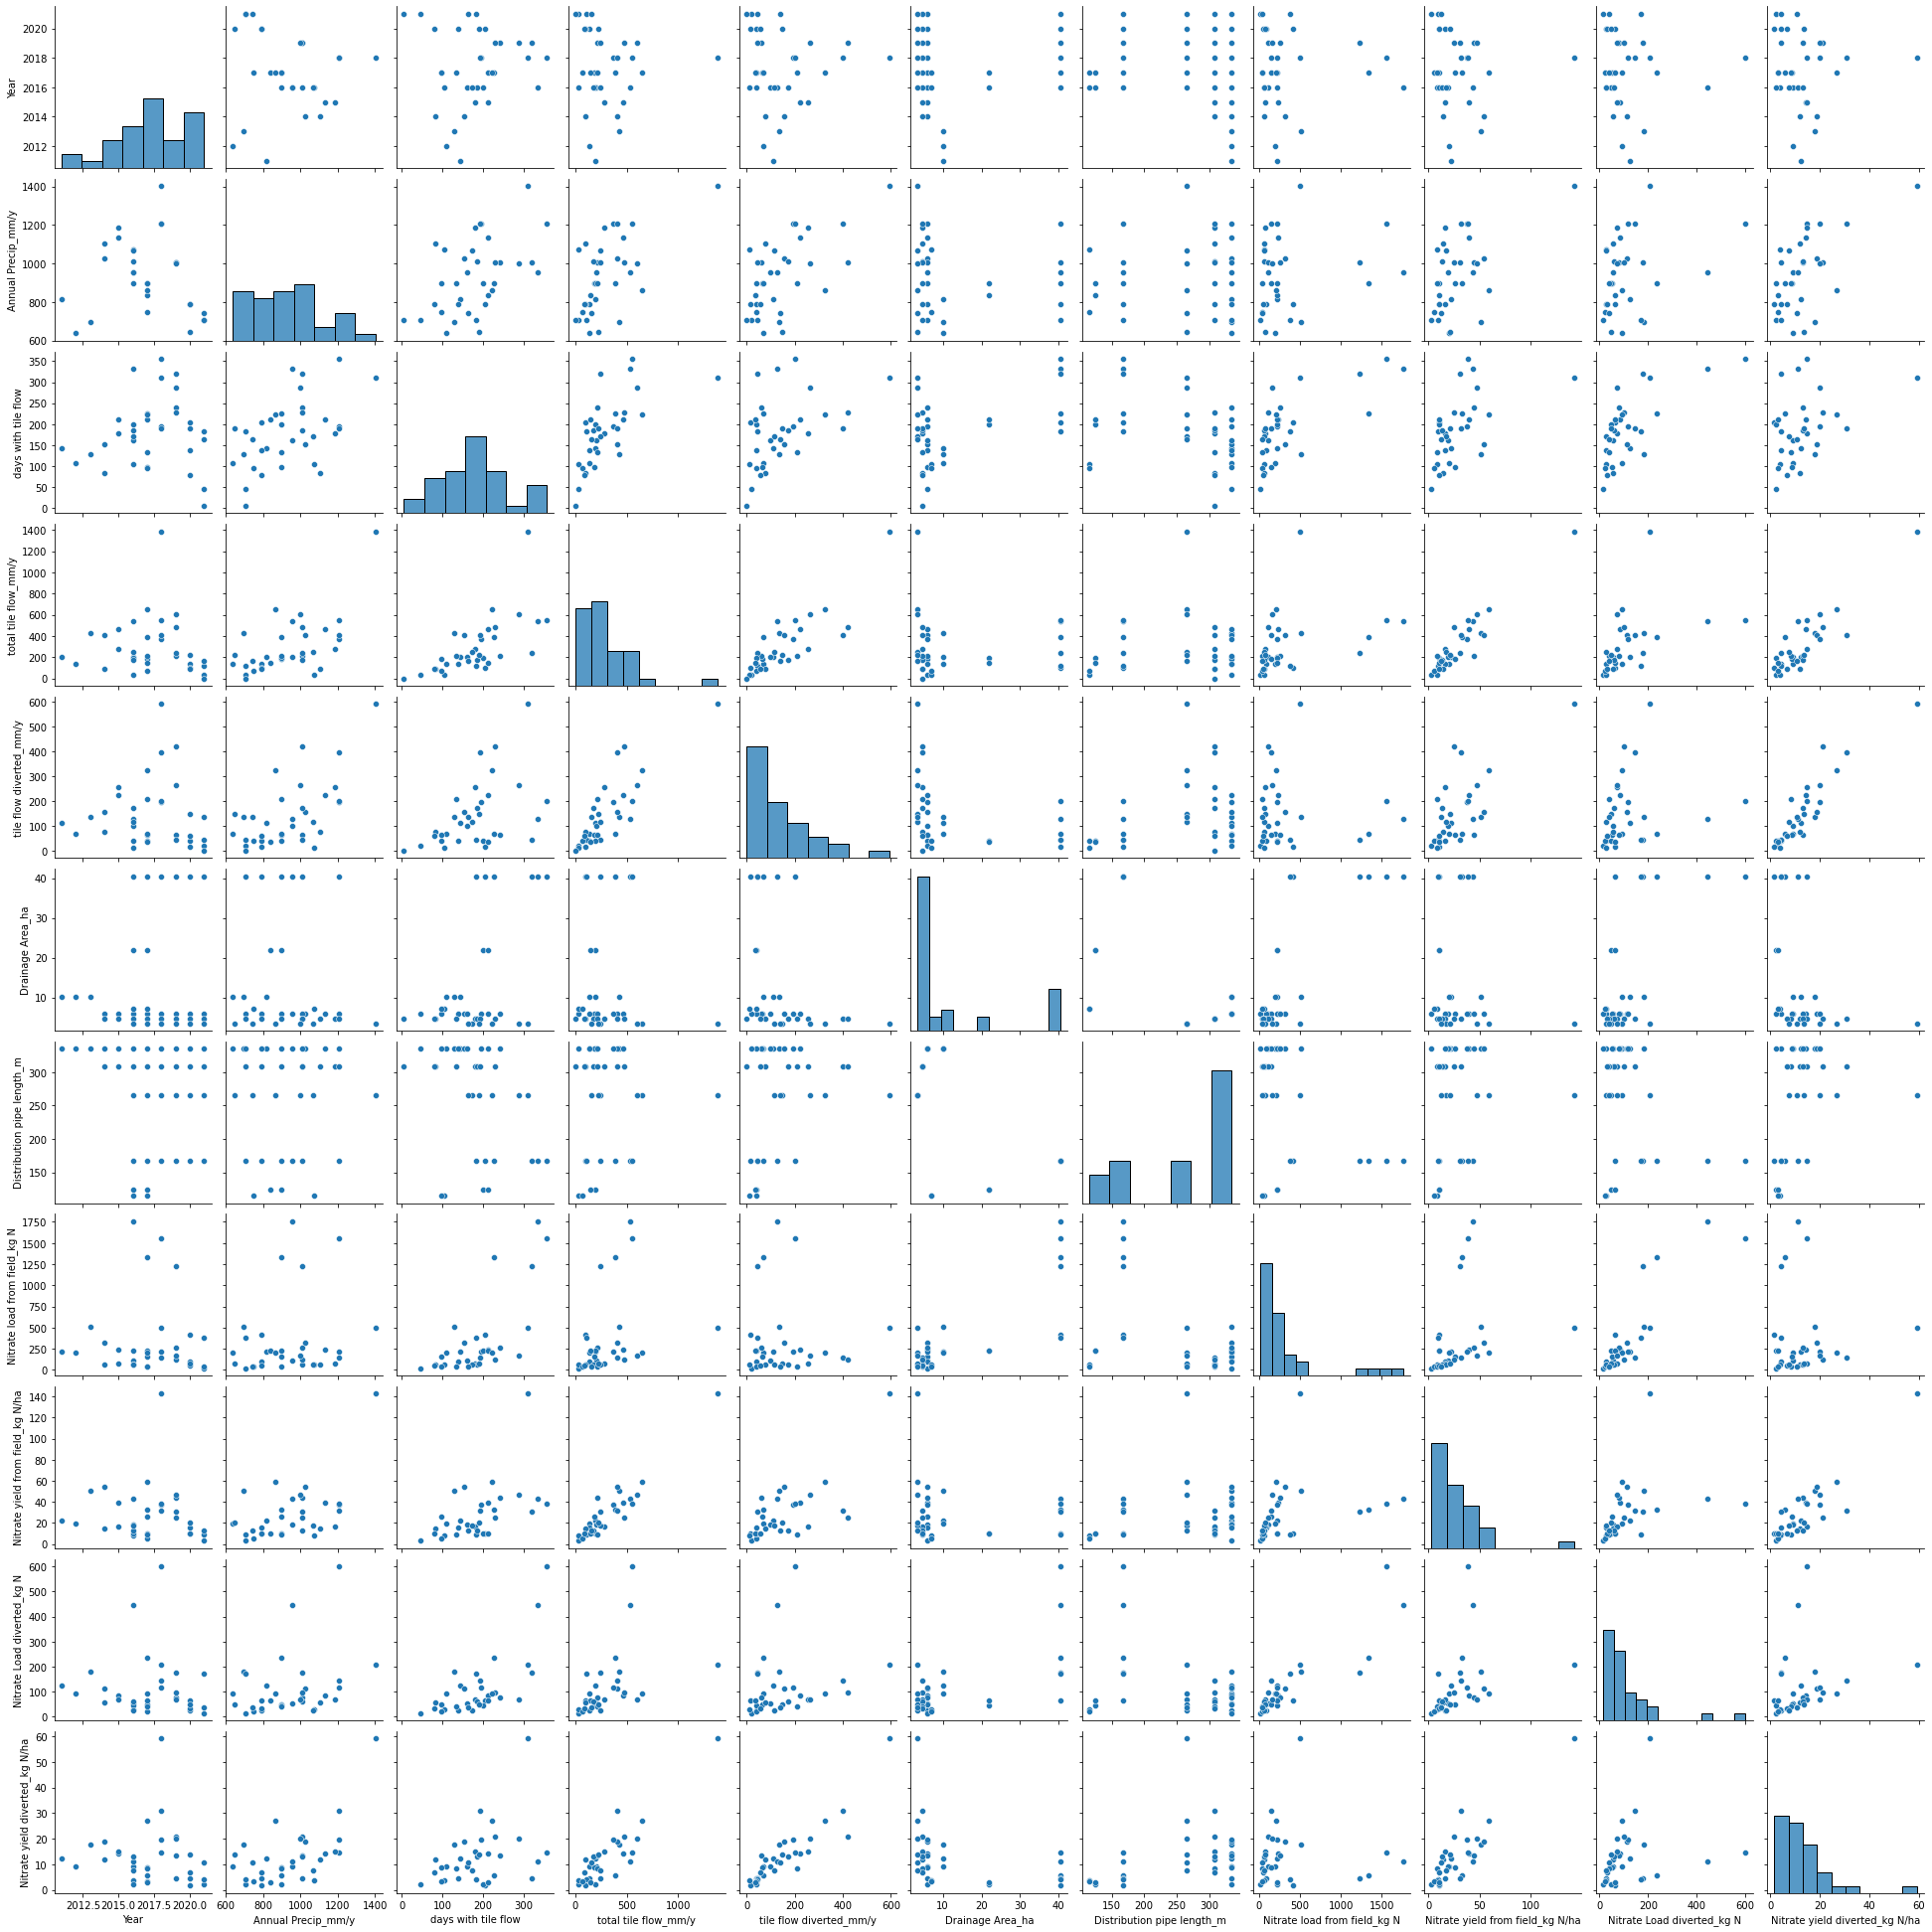

In [34]:
sns.pairplot(summary_df.iloc[:, 0:15])

In [83]:
summary_df.corr(method='pearson')

,Year,Annual Precip_mm/y,days with tile flow,total tile flow_mm/y,tile flow diverted_mm/y,Drainage Area_ha,Distribution pipe length_m,Nitrate load from field_kg N,Nitrate yield from field_kg N/ha,Nitrate Load diverted_kg N,Nitrate yield diverted_kg N/ha,Nitrate load removed_kg N,Nitrate yield removed_kg N/ha,Buffer Removal Percentage,EOF Removal Percentage,Flow Diversion Percentage,NO3-N removal rate_g/m/d,pipe_length_times_DA
Year,1.000000,-0.115922,0.177456,-0.038675,0.005435,0.152965,-0.200269,-0.011943,-0.088111,-0.062649,-0.065933,-0.077225,-0.137841,-0.110689,-0.013181,0.019298,-0.114634,0.057789
Annual Precip_mm/y,-0.115922,1.000000,0.466565,0.574747,0.598812,-0.099704,0.062888,0.178737,0.520280,0.307870,0.590563,0.322343,0.607299,-0.095132,0.051435,0.102754,0.079394,-0.134338
days with tile flow,0.177456,0.466565,1.000000,0.644748,0.427904,0.505193,-0.346970,0.694286,0.534968,0.684957,0.385606,0.547922,0.239648,-0.485811,-0.479517,-0.365988,0.309075,0.449703
total tile flow_mm/y,-0.038675,0.574747,0.644748,1.000000,0.835044,-0.030422,0.071569,0.345911,0.939239,0.466715,0.887132,0.359891,0.719434,-0.452228,-0.274330,-0.109186,0.096778,-0.027071
tile flow diverted_mm/y,0.005435,0.598812,0.427904,0.835044,1.000000,-0.330687,0.285258,-0.016453,0.703197,0.211273,0.914747,0.202311,0.841579,-0.248873,0.210877,0.387192,-0.081170,-0.321512
Drainage Area_ha,0.152965,-0.099704,0.505193,-0.030422,-0.330687,1.000000,-0.664673,0.803032,-0.076926,0.636075,-0.341112,0.517234,-0.402292,-0.252063,-0.523804,-0.590142,0.629545,0.961777
Distribution pipe length_m,-0.200269,0.062888,-0.346970,0.071569,0.285258,-0.664673,1.000000,-0.432622,0.151413,-0.287756,0.318541,-0.169134,0.452928,0.259428,0.407938,0.462046,-0.376087,-0.454232
Nitrate load from field_kg N,-0.011943,0.178737,0.694286,0.345911,-0.016453,0.803032,-0.432622,1.000000,0.302171,0.888017,0.016734,0.678698,-0.081618,-0.443928,-0.537272,-0.521710,0.611819,0.812159
Nitrate yield from field_kg N/ha,-0.088111,0.520280,0.534968,0.939239,0.703197,-0.076926,0.151413,0.302171,1.000000,0.382397,0.877709,0.307408,0.738267,-0.342163,-0.344064,-0.226522,0.072231,-0.042264
Nitrate Load diverted_kg N,-0.062649,0.307870,0.684957,0.466715,0.211273,0.636075,-0.287756,0.888017,0.382397,1.000000,0.230191,0.880618,0.171770,-0.334355,-0.322694,-0.307720,0.764373,0.665552


## Linear Regression

In [110]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

**Start with single linear regression with "pipe length times DA" variable**

In [93]:
X = summary_df["pipe_length_times_DA"]
X = X[:, np.newaxis]
Y = summary_df["Nitrate load removed_kg N"]

C:\Users\gjohnson\AppData\Local\Temp\ipykernel_10696\3154619909.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = X[:, np.newaxis]


In [94]:
model = LinearRegression()

In [95]:
model.fit(X, Y)

LinearRegression()

In [96]:
model.score(X, Y)

0.32519413361502725

**Multiple Linear Regression with "pipe_length_times_DA" and annual precipitation**

In [118]:
X = summary_df[["pipe_length_times_DA", "Annual Precip_mm/y"]]
Y = summary_df["Nitrate load removed_kg N"]

In [121]:
model = LinearRegression()
model.fit(X, Y)

LinearRegression()

In [122]:
model.score(X,Y)

0.4872812481495662

This improves the regression, increasing the R^2 to 0.49.

**Regression with statsmodels ols**

In [104]:
X = summary_df[["pipe_length_times_DA", "Annual Precip_mm/y"]]
Y = summary_df["Nitrate load removed_kg N"]

In [123]:
model1 = sm.OLS(Y, X)
#model1.params
results = model1.fit()
print("Nitrate Load Removed vs pipe lenth times drainage area")
print(results.summary())

Nitrate Load Removed vs pipe lenth times drainage area
                                    OLS Regression Results                                    
Dep. Variable:     Nitrate load removed_kg N   R-squared (uncentered):                   0.686
Model:                                   OLS   Adj. R-squared (uncentered):              0.666
Method:                        Least Squares   F-statistic:                              34.88
Date:                       Mon, 01 May 2023   Prob (F-statistic):                    9.16e-09
Time:                               00:04:14   Log-Likelihood:                         -191.64
No. Observations:                         34   AIC:                                      387.3
Df Residuals:                             32   BIC:                                      390.3
Df Model:                                  2                                                  
Covariance Type:                   nonrobust                                              

The statsmodel method resulted in a different R^2 due to not including a constant. 

In [128]:
xfit = {"pipe_length_times_DA": [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000],
       "Annual Precip_mm/y": [500, 600, 700, 800, 900, 1000, 1100, 1200]}
xfit = pd.DataFrame(xfit)
xfit

,pipe_length_times_DA,Annual Precip_mm/y
0,0,500
1,1000,600
2,2000,700
3,3000,800
4,4000,900
5,5000,1000
6,6000,1100
7,7000,1200


In [132]:
yfit = model.predict(xfit)

In [133]:
yfit

array([-66.40156727, -21.36215286,  23.67726156,  68.71667597,
       113.75609038, 158.79550479, 203.83491921, 248.87433362])

**Plot Fitted Data on top of raw data**

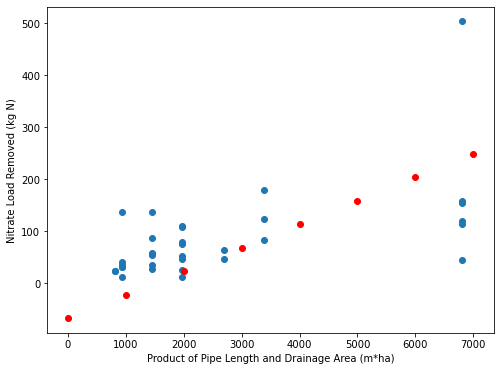

In [239]:
plt.figure(figsize = (8,6))
plt.scatter(summary_df["pipe_length_times_DA"], summary_df["Nitrate load removed_kg N"])
plt.scatter(xfit["pipe_length_times_DA"], yfit, color = "red")
plt.ylabel("Nitrate Load Removed (kg N)")
plt.xlabel("Product of Pipe Length and Drainage Area (m*ha)")
plt.savefig("pipelength_da_loadremoval_regression.png")

## PCA

In [140]:
summary_df.shape

(34, 23)

In [147]:
from sklearn.preprocessing import StandardScaler

X_data = summary_df.drop(["Nitrate load removed_kg N", "Study", "State", "County", "Year", "Site", "Notes"], axis = 1)
Y_data = summary_df["Nitrate load removed_kg N"]

**Scale Data**

In [148]:
scaled_data = StandardScaler()
scaled_X = scaled_data.fit_transform(X_data)

<AxesSubplot:xlabel='Annual Precip_mm/y', ylabel='Density'>

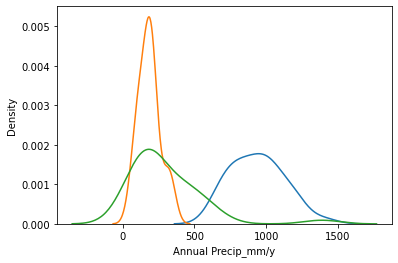

In [149]:
sns.kdeplot(X_data.iloc[:,0])
sns.kdeplot(X_data.iloc[:,1])
sns.kdeplot(X_data.iloc[:,2])

<AxesSubplot:ylabel='Density'>

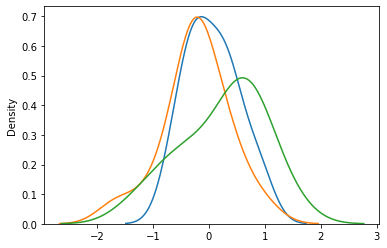

In [150]:
sns.kdeplot(scaled_X[0])
sns.kdeplot(scaled_X[1])
sns.kdeplot(scaled_X[2])

**Run PCA**

In [151]:
from sklearn.decomposition import PCA

In [152]:
pca1 = PCA(n_components = 4)
pca1.fit(scaled_X)
trained_pca1 = pca1.transform(scaled_X)

In [153]:
trained_pca1.shape

(34, 4)

In [160]:
pc_df = pd.DataFrame(data = trained_pca1, columns = ['PC1', 'PC2', 'PC3', 'PC4'])
pc_df

,PC1,PC2,PC3,PC4
0,-0.894648,-0.246986,1.006084,0.826345
1,-1.200007,-1.160331,0.156672,0.947845
2,0.716080,0.311457,0.768884,2.248284
3,0.062206,1.464109,0.082704,1.758783
4,-0.026593,1.534125,-0.349580,0.655338
5,-1.416594,-0.072852,-0.180123,0.583780
6,-1.298977,-0.561841,-0.668233,1.280113
7,-0.131499,1.899019,0.419830,0.570278
8,-0.137524,0.381668,-0.798270,1.344416
9,-1.651331,-1.257809,-1.115828,1.263773


In [161]:
pc_df['nitrate removed'] = Y_data
pc_df

,PC1,PC2,PC3,PC4,nitrate removed
0,-0.894648,-0.246986,1.006084,0.826345,123.0
1,-1.200007,-1.160331,0.156672,0.947845,84.0
2,0.716080,0.311457,0.768884,2.248284,179.0
3,0.062206,1.464109,0.082704,1.758783,111.0
4,-0.026593,1.534125,-0.349580,0.655338,80.0
5,-1.416594,-0.072852,-0.180123,0.583780,53.0
6,-1.298977,-0.561841,-0.668233,1.280113,47.0
7,-0.131499,1.899019,0.419830,0.570278,108.0
8,-0.137524,0.381668,-0.798270,1.344416,75.3
9,-1.651331,-1.257809,-1.115828,1.263773,26.2


In [156]:
pca1.explained_variance_ratio_

array([0.36815118, 0.33693547, 0.10728418, 0.06004578])

In [157]:
df = pd.DataFrame({'var':pca1.explained_variance_ratio_, 'PC': ['PC1', 'PC2', 'PC3', 'PC4']})
df

,var,PC
0,0.368151,PC1
1,0.336935,PC2
2,0.107284,PC3
3,0.060046,PC4


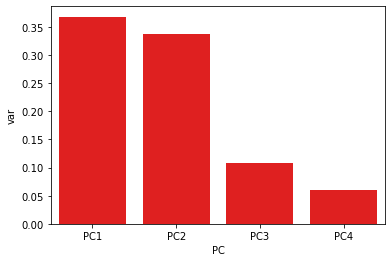

In [240]:
sns.barplot(x='PC', y = 'var', data = df, color = 'red')
plt.savefig("PCA_plot.png")

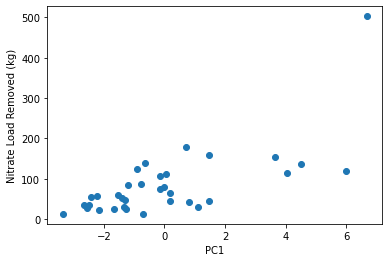

In [241]:
plt.scatter(pc_df["PC1"], Y_data)
plt.xlabel("PC1")
plt.ylabel("Nitrate Load Removed (kg)")
plt.savefig("PCA_regression_plot.png")

### Linear Regression on PCA Data

In [165]:
x_pca = pc_df["PC1"]
X_pca = x_pca[:, np.newaxis]

C:\Users\gjohnson\AppData\Local\Temp\ipykernel_10696\3836034575.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_pca = x_pca[:, np.newaxis]


In [166]:
model_pca = LinearRegression()
model_pca.fit(X_pca, Y_data)

LinearRegression()

In [169]:
model_pca.score(X_pca, Y_data)

0.4804857118119634

The R^2 was nearly the same using PC1 as the x (predictor) variable compared to the original regression using both the product of drainage area and pipe length and the annual precipitation.

In [183]:
x_pca = pc_df[["PC1", "PC2"]]
#X_pca = x_pca[:, np.newaxis]
x_pca

,PC1,PC2
0,-0.894648,-0.246986
1,-1.200007,-1.160331
2,0.716080,0.311457
3,0.062206,1.464109
4,-0.026593,1.534125
5,-1.416594,-0.072852
6,-1.298977,-0.561841
7,-0.131499,1.899019
8,-0.137524,0.381668
9,-1.651331,-1.257809


In [184]:
model_pca.fit(x_pca, Y_data)

LinearRegression()

In [185]:
model_pca.score(x_pca, Y_data)

0.48237190170086675

Using both PC1 and PC2 barely improves the R^2, by about 0.002

## Kmeans Clustering

In [186]:
from sklearn.cluster import KMeans

In [228]:
reduced_data = summary_df.drop(["Study", "State", "County", "Notes"], axis = 1)
reduced_data

,Site,Year,Annual Precip_mm/y,days with tile flow,total tile flow_mm/y,tile flow diverted_mm/y,Drainage Area_ha,Distribution pipe length_m,Nitrate load from field_kg N,Nitrate yield from field_kg N/ha,Nitrate Load diverted_kg N,Nitrate yield diverted_kg N/ha,Nitrate load removed_kg N,Nitrate yield removed_kg N/ha,Buffer Removal Percentage,EOF Removal Percentage,Flow Diversion Percentage,NO3-N removal rate_g/m/d,pipe_length_times_DA
0,BC-1,2011,815.0,143,198.0,111.0,10.1,335,220.0,21.80,123.0,12.2,123.0,12.20,1.000,0.559,0.560,2.568,3383.5
1,BC-1,2012,637.0,108,140.0,70.0,10.1,335,200.0,19.80,92.0,9.1,84.0,8.30,0.913,0.420,0.500,2.322,3383.5
2,BC-1,2013,695.0,129,429.0,135.0,10.1,335,514.0,50.90,181.0,17.9,179.0,17.70,0.989,0.348,0.320,4.142,3383.5
3,BC-1,2014,1027.0,153,406.0,157.0,5.9,335,320.0,54.20,111.0,18.8,111.0,18.80,1.000,0.347,0.390,2.166,1976.5
4,BC-1,2015,1133.0,212,468.0,223.0,5.9,335,233.0,39.50,85.0,14.4,80.0,13.60,0.941,0.343,0.480,1.126,1976.5
5,BC-1,2016,955.0,161,204.0,99.0,5.9,335,111.0,18.80,55.0,9.3,53.0,9.00,0.964,0.477,0.480,0.983,1976.5
6,BC-1,2017,899.0,97,187.0,66.0,5.9,335,151.0,25.60,51.0,8.6,47.0,8.00,0.922,0.311,0.350,1.446,1976.5
7,BC-1,2018,1208.4,194,367.0,195.0,5.9,335,219.0,37.12,117.0,19.8,108.0,18.31,0.923,0.493,0.531,1.662,1976.5
8,BC-1,2019,1007.1,240,215.0,63.0,5.9,335,260.0,44.07,78.3,13.3,75.3,12.76,0.962,0.290,0.293,0.937,1976.5
9,BC-1,2020,788.6,138,140.0,41.0,5.9,335,94.5,16.02,26.5,4.5,26.2,4.44,0.989,0.277,0.293,0.567,1976.5


In [230]:
X_clust = reduced_data.drop(["Site", "Year"], axis = 1)

**Try 6 clusters**

In [236]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(X_clust)
y_kmeans = kmeans.predict(X_clust)

In [237]:
y_kmeans

array([2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 4, 4, 0, 0, 2, 2, 3,
       3, 3, 3, 3, 3, 3, 0, 0, 5, 0, 0, 0])

In [238]:
cluster_sites = pd.DataFrame(y_kmeans, columns = ["cluster_site"])
cluster_sites["Site"] = reduced_data["Site"]
cluster_sites["Year"] = reduced_data["Year"]
cluster_sites

,cluster_site,Site,Year
0,2,BC-1,2011.0
1,2,BC-1,2012.0
2,2,BC-1,2013.0
3,3,BC-1,2014.0
4,3,BC-1,2015.0
5,3,BC-1,2016.0
6,3,BC-1,2017.0
7,3,BC-1,2018.0
8,3,BC-1,2019.0
9,3,BC-1,2020.0


**Try 4 Clusters**

In [234]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X_clust)
y_kmeans = kmeans.predict(X_clust)

In [235]:
cluster_sites = pd.DataFrame(y_kmeans, columns = ["cluster_site"])
cluster_sites["Site"] = reduced_data["Site"]
cluster_sites["Year"] = reduced_data["Year"]
cluster_sites

,cluster_site,Site,Year
0,3,BC-1,2011.0
1,3,BC-1,2012.0
2,3,BC-1,2013.0
3,2,BC-1,2014.0
4,2,BC-1,2015.0
5,2,BC-1,2016.0
6,2,BC-1,2017.0
7,2,BC-1,2018.0
8,2,BC-1,2019.0
9,2,BC-1,2020.0


Using four clusters results in good grouping across the sites and site conditions. Notable, the BC-1 drainage area was reduced from 2013 to 2014, and the clusters picked up on that difference. BC-2 is clearly clustered separate from the other sites, which matches reality as it has a much larger drainage area, and thus much larger flows and loads. 